# Import Packages

In [2]:
# Importing Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os

# NLP Packages
import nltk 
from nltk.corpus import stopwords
from textblob import TextBlob 
from textblob import Word
import re
import string

# WordCloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

# Pandas Settings
pd.set_option('display.max_columns', 10000)
pd.set_option('display.max_rows', 100)

# Solve warnings
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

# Sentiment Analysis

## Import DataFrame

In [3]:
# Import csv file
df = pd.read_csv('../csv/Hotel_Reviews.csv')

In [4]:
# Selecting only the columns that I will use
features = ['Negative_Review','Positive_Review', 'Reviewer_Score']
df = df[features]

## Create a function for Sentiment Analysis

In this step, I will generate a sentiment analysis. Normally, this would be a step that I'd run after data cleaning for NLP. However, previous tests showed me that data cleaning does not affect the sentiment analysis using TextBlob.

Running sentiment analysis takes a lot of time because I have more than 515K observations. For this reason, once the sentiment analysis is created, I will pickle the DataFrame and upload it again, so it won't run again.

In [5]:
# Create a function to get subjectivity
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

# Create a function to get polarity with tweets
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

<b>NOTE:</b>

The following cell takes around 10 minutes to run. For this reason, I will save the DataFrame into a csv file and upload it again.

In [6]:
# # Create new columns to compare polarity and subjetivity on Negative Reviews
# df['Polarity_Net'] = df['Negative_Review'].apply(getPolarity)
# df['Polarity_Pos'] = df['Positive_Review'].apply(getPolarity)

In [7]:
# # Saving csv with sentiment analysis
# df.to_csv("../csv/sentiment_analysis.csv")

In [3]:
# Importing DataFrame with new Polarity column
df = pd.read_csv("../csv/df_sentiment_analysis.csv", index_col=0)

In [4]:
# Creating function to classify the Sentiment Analysis
df['Sent_Analysis_Neg'] = df['Polarity_Net'].apply(lambda x: 0 if x < 0 else 1 if x > -0.1 and x < 0.1 else 2)
df['Sent_Analysis_Pos'] = df['Polarity_Pos'].apply(lambda x: 0 if x < 0 else 1 if x > -0.1 and x < 0.1 else 2)

In [5]:
df['Score'] = df['Reviewer_Score'].apply(lambda x: 0 if x < 6 else 1)

## Evaluation Results

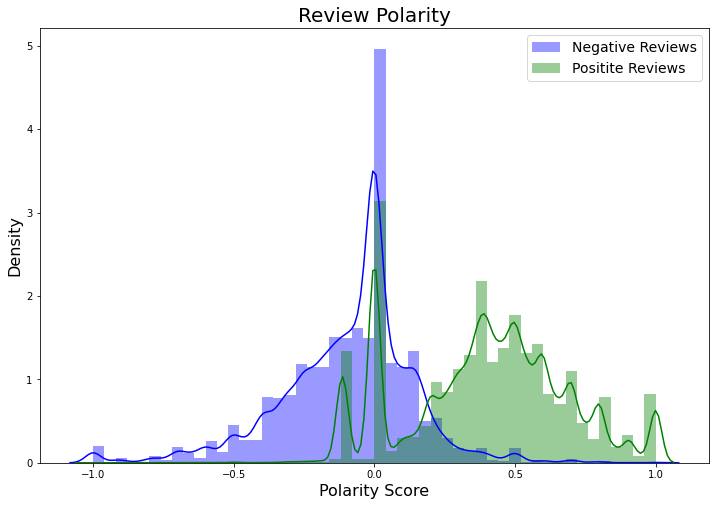

In [6]:
# Creating density plot for the labels polaritu scores
plt.figure(figsize=(12, 8))
ax = sns.distplot(df['Polarity_Net'][df['Score'] == 0], label='Negative Reviews', color='blue')
ax = sns.distplot(df['Polarity_Pos'][df['Score'] == 1], label='Positite Reviews', color='green')

# Setting label, title and legend
ax.set_title('Review Polarity', fontsize=20)
ax.set_ylabel('Density', fontsize=16)
ax.set_xlabel('Polarity Score', fontsize=16)
ax.legend(prop=dict(size=14))
plt.savefig('../images/sentiment_analysis.png', bbox_inches = "tight", pad_inches=.5, dpi=300)
plt.show()

### Findings and Takeaways:

- It was created Subjectivity and Polarity features using sentiment analysis for Negative and Positive Reviews. 
- Polarity ranges between -1 and 1. Where -1 means that the review was very negative and 1 means that the review was very positive
- Seems like sentiment analysis does a good job identifying positive reviews, but the negative reviews could be improved

Using the density plot to analyze the sentiment analysis, we can see that most are concentrated in the neutral reviews. We know from the EDA that most reviews are mostly positive, so we can say that the TextBlob is not as accurate as the final model.